# Regression Models and Complementary Datasets
**Project**: M4 Project 4
**Author**: Jacob Buysse

In this project we will be performing regression modeling on home sale pricing and them combining that dataset with a complimentary dataset to see how it might improve the model performance.

In this notebook we will be using...

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Part I

We need to load and clean the given dataset.  First let us load the file and look at the head/info/describe results.

In [3]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


So we have 21,613 records, 21 columns, and no missing values.

In [6]:
df.id.value_counts()

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

* `id` - This column has 21,436 distinct values (so some properties are listed multiple times; some twice and one thrice).
* `date` - This column appears to be a string in `YYYYMMDDTHHMMSS` format.
* `price` - The sale price for the house (assumed to be in USD(\\$)) ranging from \\$75,000 to \\$7,700,000 (\\$540,000 +/- \\$367,000).
* `bedrooms` - Number of bedrooms ranging from 0 to 33.
* `bathrooms` - Number of bathrooms ranging from 0 to 8 (as a float, so there must be half baths accounted for).
* `sqft_living` - Square footage of living space ranging from 290 to 13,540.
* `sqft_lot` - Lot size in square feet ranging from 520 to 1,651,000.
* `floors` - Number of floors ranging from 1 to 3.5 (not quite sure what a 1/2 floor is).
* `waterfront` - Boolean indicator (0 or 1) if the living space overlooks waterfront.
* `view` - An index from 0 (worst) to 4 (best) of how good the view is.
* `condition` - An index from 1 (worst) to 5 (best) of the condition of the living space.
* `grade` - An index from 1-3 (falls short), 4-10 (average), 11-13 (high) of the construction and design quality.
* `sqft_above` - The square footage of the house that is above ground level ranging from 290 to 9410.
* `sqft_basement` - The square footage of the house that is below ground level ranging from 0 to 4820.
* `yr_built` - The year the house was built ranging from 1900 to 2015 (note that 1900 likely means unknown).
* `yr_renovated` - The year the house was last renovated ranging from 0 to 2015 (0 likely means never renovated or unknown).
* `zipcode` - The 5-digit zip code ranging from 98001 to 98199.
* `lat` - The latitude (degrees north of equator) ranging from 47.1 to 47.7.
* `long` - The longitude (degrees east of prime meridian, negative meaning west) ranging from -122.5 to -121.3.
* `sqft_living15` - Living room size in 2015 (must assume renovations?).
* `sqft_lot15` - Lot size in 2015 (must assume renovations?).

## ID Analysis

There were duplicate property records in the original dataset.  Let us filter down to only the most recent record for each property.

In [7]:
filtered_df = df[df.groupby("id", as_index=False).date.transform(max) == df.date].copy()
filtered_df.shape

(21436, 21)

## Date Analysis

Let us extract the year the property was sold as an int so that we can derive an age property.

In [8]:
filtered_df["yr_sold"] = filtered_df.date.apply(lambda value: int(value[:4]))
filtered_df.yr_sold.describe()

count    21436.000000
mean      2014.325247
std          0.468478
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: yr_sold, dtype: float64

## Bedrooms Analysis

Let us look at the distinct values for bedrooms and a histogram plot.

In [9]:
filtered_df.bedrooms.value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

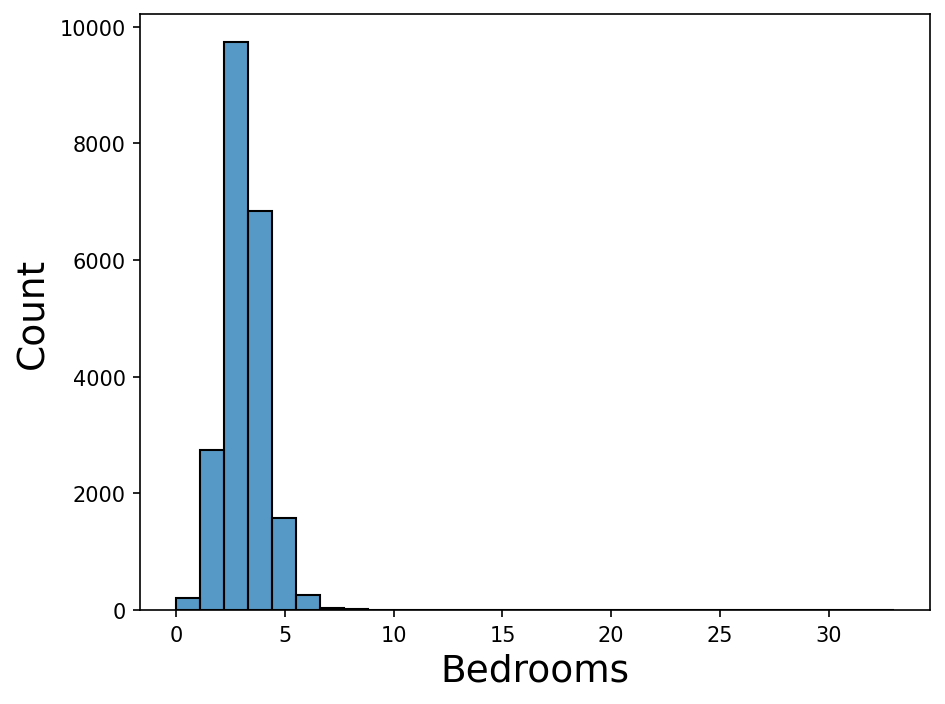

In [10]:
plot_bedrooms = sns.histplot(filtered_df.bedrooms, bins=30)
plot_bedrooms.set(xlabel="Bedrooms", ylabel="Count");

We can see that 13 properties have a bedroom count of zero.  We can exclude these.  We can also see that there is one big outlier with a bedroom count of 33 that we should definitely exclude.  However, there are only 10 properties with more than 8 bedrooms (6 with 9, 3 with 10, and 1 with 11).  We don't have a large enough sample to split into valid train/test groups for those so we will also exclude those extremes.

We will also convert the remaining columns to a categorical type.

In [11]:
filtered_df = filtered_df[(filtered_df.bedrooms >= 1) & (filtered_df.bedrooms <= 8)]
filtered_df.shape

(21412, 22)

In [12]:
filtered_df.bedrooms = filtered_df.bedrooms.astype('category')
filtered_df.bedrooms.cat.categories

Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

## Bathrooms Analysis

Let us look at the distinct values for bathrooms and a histogram plot.

In [13]:
filtered_df.bathrooms.value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1912
1.50    1429
2.75    1182
3.00     743
3.50     729
3.25     586
3.75     155
4.00     133
4.50      97
4.25      79
0.75      70
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
6.75       2
8.00       2
6.25       2
6.50       2
7.75       1
Name: count, dtype: int64

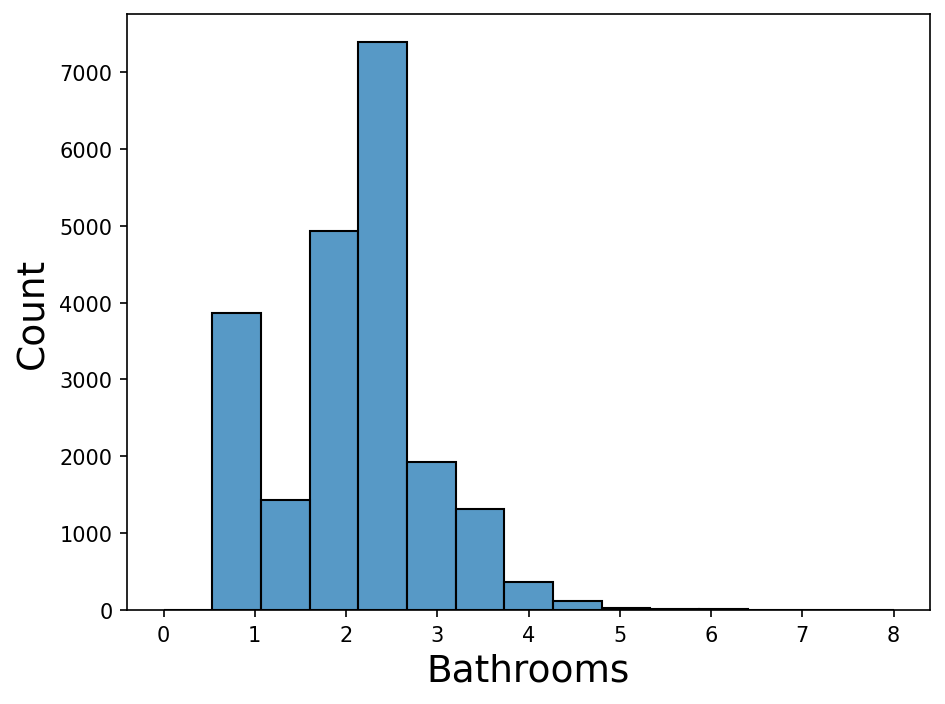

In [14]:
plot_bathrooms = sns.histplot(filtered_df.bathrooms, bins=15)
plot_bathrooms.set(xlabel="Bathrooms", ylabel="Count");

We can see that there are 3 remaining properties with zero bathrooms listed that we can likely filter out.  There are also a whole number of bathrooms between 1 and 8 but with only 15 with 6 or more.  We can also see that there is a fractional bathroom (quarter, half, three-quarters) with 4 at 0.50 and 70 at 0.75.  This is interesting, because we can ignore the 0 bathrooms items, but if we split out the partial bathrooms from the full bathrooms we will be left with zero whole bathrooms and that will be valid data.

In [15]:
filtered_df = filtered_df[(filtered_df.bathrooms > 0) & (filtered_df.bathrooms < 6)]
filtered_df.shape

(21394, 22)

So we are down to 21394 rows.  Let us create a new `whole_bathrooms` feature.

In [16]:
filtered_df['whole_bathrooms'] = filtered_df.bathrooms.apply(lambda value: np.trunc(value)).astype('int64').astype('category')
filtered_df.whole_bathrooms.cat.categories

Index([0, 1, 2, 3, 4, 5], dtype='int64')

And let us convert the partial bathroom information into a categorical feature `partial_bathroom`: 0 - none, 1 - 0.25, 2 - 0.50, 3 - 0.75.

In [17]:
filtered_df['partial_bathroom'] = filtered_df.bathrooms.apply(lambda value: 4 * (value - np.trunc(value))).astype('int64').astype('category')
filtered_df.partial_bathroom.cat.categories

Index([0, 1, 2, 3], dtype='int64')